In [1]:
# Import libraries
import pandas as pd
import numpy as np
import math
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

# Turn off Warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in full Motor Vehicle Collision Dataset
mvc_df = pd.read_csv('../Motor_Vehicle_Collisions_-_Crashes.csv')

In [3]:
mvc_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
# Cleanup dataset
mvc_df['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)
mvc_df['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)

# Add Column identifying YEAR
mvc_df['YEAR'] = mvc_df['CRASH DATE'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').year)

# Drop Columns not used for this analysis
mvc_df.drop(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 
             'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 
             'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
             'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
             'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis=1, inplace=True)

mvc_df.head()

NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                        2.0                       0.0   
1                        1.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
0  Aggressive Driving/Road Rage                   Unspecified   
1             Pavement Slippery                           NaN   
2         Following Too Closely                   Unspecified   
3                   Unspecified                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  YEAR  
0                           NaN       4455765  2021  
1                           NaN       4513547  2022  
2                           NaN       4541903  2022  
3                           NaN       4456314  2021  
4                           NaN       4486609  2021

In [6]:
# Function for finding the number of vehicles invovled in the collission
def num_vehicles_invovled(x):
    if(pd.isna(x['CONTRIBUTING FACTOR VEHICLE 2'])== True):
        return 1
    if(pd.isna(x['CONTRIBUTING FACTOR VEHICLE 2']) == False and pd.isna(x['CONTRIBUTING FACTOR VEHICLE 3']) == True):
        return 2
    if(pd.isna(x['CONTRIBUTING FACTOR VEHICLE 3']) == False and pd.isna(x['CONTRIBUTING FACTOR VEHICLE 4']) == True):
        return 3
    if(pd.isna(x['CONTRIBUTING FACTOR VEHICLE 4']) == False and pd.isna(x['CONTRIBUTING FACTOR VEHICLE 5']) == True):
        return 4
    if(pd.isna(x['CONTRIBUTING FACTOR VEHICLE 5']) == False):
        return 5

# Create new Column for number of cars involved
mvc_df['CARS INVOLVED'] = mvc_df.apply(lambda x: num_vehicles_invovled(x), axis=1)
mvc_df.head()

NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                        2.0                       0.0   
1                        1.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
0  Aggressive Driving/Road Rage                   Unspecified   
1             Pavement Slippery                           NaN   
2         Following Too Closely                   Unspecified   
3                   Unspecified                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  YEAR  CARS INVOLVED  
0                           NaN       4455765  2021              2  
1                           NaN       4513547  2022              1  
2                           NaN       4541903  2022              2  
3                           NaN       4456314  2021              1  
4                           NaN       4486609  2021              1

In [7]:
def joint_causation(x):
    result = str(x['CONTRIBUTING FACTOR VEHICLE 1']) + '|'
    if(pd.isna(x['CONTRIBUTING FACTOR VEHICLE 2']) == False):
        result += str(x['CONTRIBUTING FACTOR VEHICLE 2']) + '|'
    if(pd.isna(x['CONTRIBUTING FACTOR VEHICLE 3']) == False):
        result += str(x['CONTRIBUTING FACTOR VEHICLE 3']) + '|'
    if(pd.isna(x['CONTRIBUTING FACTOR VEHICLE 4']) == False):
        result += str(x['CONTRIBUTING FACTOR VEHICLE 4']) + '|'
    if(pd.isna(x['CONTRIBUTING FACTOR VEHICLE 5']) == False):
        result += str(x['CONTRIBUTING FACTOR VEHICLE 5']) + '|'
    return result[:-1]
        
mvc_df['CAUSATION FACTOR'] = mvc_df.apply(lambda x: joint_causation(x), axis=1 )


In [8]:
# Add Columns representing if collission resulted in Injury or Fatality
mvc_df['HAS INJURY'] = mvc_df['NUMBER OF PERSONS INJURED'].apply(lambda x: 1 if (x > 0) else 0)
mvc_df['HAS FATALITY'] = mvc_df['NUMBER OF PERSONS KILLED'].apply(lambda x: 1 if (x > 0) else 0)
mvc_df.head()

NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                        2.0                       0.0   
1                        1.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
0  Aggressive Driving/Road Rage                   Unspecified   
1             Pavement Slippery                           NaN   
2         Following Too Closely                   Unspecified   
3                   Unspecified                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  YEAR  CARS INVOLVED  \
0                           NaN       4455765  2021              2   
1                           NaN       4513547  2022              1   
2                           NaN       4541903  2022              2   
3                           NaN       4456314  2021              1   
4                           NaN       4486609  2021              1   

                           CAUSATION FACTOR  HAS INJURY  HAS FATALITY  
0  Aggressive Driving/Road Rage|Unspecified           1             0  
1                         Pavement Slippery           1             0  
2         Following Too Closely|Unspecified           0             0  
3                               Unspecified           0             0  
4                                       nan           0             0

In [9]:
mvc_df.loc[:,['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

NUMBER OF PERSONS INJURED NUMBER OF PERSONS KILLED
count             2026647.00000            2026647.00000
mean                    0.30362                  0.00145
std                     0.69481                  0.04019
min                     0.00000                  0.00000
25%                     0.00000                  0.00000
50%                     0.00000                  0.00000
75%                     0.00000                  0.00000
max                    43.00000                  8.00000

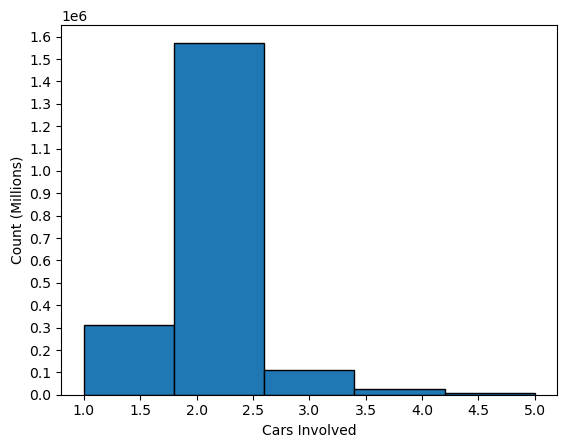

In [11]:
plt.hist(mvc_df['CARS INVOLVED'], bins=5, edgecolor='black')
plt.yticks(np.arange(0, 1700000, step=100000))
plt.ylabel('Count (Millions)')
plt.xlabel('Cars Involved')
plt.plot()
plt.show()

In [12]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Injuries
injury_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 1'], mvc_df['HAS INJURY'], margins=True, margins_name="Total")

# Sort by number of collissions
injury_crosstab_df.sort_values(injury_crosstab_df.columns[2], ascending = False, inplace=True)

# Output Crosstab
print(injury_crosstab_df.to_string())

HAS INJURY                                                   0       1    Total
CONTRIBUTING FACTOR VEHICLE 1                                                  
Total                                                  1570482  449768  2020250
Unspecified                                             562618  132160   694778
Driver Inattention/Distraction                          305268   98127   403395
Failure to Yield Right-of-Way                            72892   46797   119689
Following Too Closely                                    80305   27682   107987
Backing Unsafely                                         67604    7640    75244
Other Vehicular                                          52078   10836    62914
Passing or Lane Usage Improper                           47573    8206    55779
Turning Improperly                                       42441    7696    50137
Passing Too Closely                                      46773    3350    50123
Fatigued/Drowsy                         

In [13]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Injuries
p_injury_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 1'], mvc_df['HAS INJURY'], margins=True, margins_name="Total", normalize='index')

# Sort by percentage of collisions that resulted in injuries
p_injury_crosstab_df.sort_values(p_injury_crosstab_df.columns[1], ascending = False, inplace=True)

# Output Crosstab
print(p_injury_crosstab_df.to_string())

HAS INJURY                                                    0         1
CONTRIBUTING FACTOR VEHICLE 1                                            
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  0.255441  0.744559
Illnes                                                 0.344763  0.655237
Listening/Using Headphones                             0.416667  0.583333
Drugs (illegal)                                        0.513577  0.486423
Passenger Distraction                                  0.526468  0.473532
Traffic Control Disregarded                            0.551310  0.448690
Glare                                                  0.589667  0.410333
Unsafe Speed                                           0.591285  0.408715
Headlights Defective                                   0.592308  0.407692
Tinted Windows                                         0.598765  0.401235
Failure to Yield Right-of-Way                          0.609012  0.390988
Physical Disability                   

In [14]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Fatality
fatality_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 1'], mvc_df['HAS FATALITY'], margins=True, margins_name="Total")

# Sort by number of collissions
fatality_crosstab_df.sort_values(fatality_crosstab_df.columns[2], ascending = False, inplace=True)

# Output Crosstab
print(fatality_crosstab_df.to_string())


HAS FATALITY                                                 0     1    Total
CONTRIBUTING FACTOR VEHICLE 1                                                
Total                                                  2017441  2809  2020250
Unspecified                                             693833   945   694778
Driver Inattention/Distraction                          403054   341   403395
Failure to Yield Right-of-Way                           119441   248   119689
Following Too Closely                                   107966    21   107987
Backing Unsafely                                         75204    40    75244
Other Vehicular                                          62892    22    62914
Passing or Lane Usage Improper                           55750    29    55779
Turning Improperly                                       50119    18    50137
Passing Too Closely                                      50121     2    50123
Fatigued/Drowsy                                          47351  

In [15]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Fatality
p_fatality_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 1'], mvc_df['HAS FATALITY'], margins=True, margins_name="Total", normalize='index')

# Sort by percentage of collissions that result in fatality
p_fatality_crosstab_df.sort_values(p_fatality_crosstab_df.columns[1], ascending = False, inplace=True)

# Output Crosstab
print(p_fatality_crosstab_df.to_string())

HAS FATALITY                                                  0         1
CONTRIBUTING FACTOR VEHICLE 1                                            
Illnes                                                 0.968828  0.031172
Unsafe Speed                                           0.987591  0.012409
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  0.989713  0.010287
Drugs (illegal)                                        0.990555  0.009445
Drugs (Illegal)                                        0.992840  0.007160
Traffic Control Disregarded                            0.993576  0.006424
Tinted Windows                                         0.993827  0.006173
Passenger Distraction                                  0.993965  0.006035
Tow Hitch Defective                                    0.995327  0.004673
Alcohol Involvement                                    0.995367  0.004633
Physical Disability                                    0.996576  0.003424
Pavement Defective                    

In [16]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Injuries
injury_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 2'], mvc_df['HAS INJURY'], margins=True, margins_name="Total")

# Sort by number of collissions
injury_crosstab_df.sort_values(injury_crosstab_df.columns[2], ascending = False, inplace=True)

# Output Crosstab
print(injury_crosstab_df.to_string())

HAS INJURY                                                   0       1    Total
CONTRIBUTING FACTOR VEHICLE 2                                                  
Total                                                  1396806  320130  1716936
Unspecified                                            1186075  259483  1445558
Driver Inattention/Distraction                           71440   20690    92130
Other Vehicular                                          25760    5710    31470
Following Too Closely                                    12969    5489    18458
Failure to Yield Right-of-Way                            12660    4137    16797
Passing or Lane Usage Improper                           10271    2228    12499
Fatigued/Drowsy                                           8862    1973    10835
Turning Improperly                                        7454    1178     8632
Passing Too Closely                                       7551     955     8506
Backing Unsafely                        

In [17]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Injuries
p_injury_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 2'], mvc_df['HAS INJURY'], margins=True, margins_name="Total", normalize='index')

# Sort by percentage of collisions that resulted in injuries
p_injury_crosstab_df.sort_values(p_injury_crosstab_df.columns[1], ascending = False, inplace=True)

# Output Crosstab
print(p_injury_crosstab_df.to_string())

HAS INJURY                                                    0         1
CONTRIBUTING FACTOR VEHICLE 2                                            
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  0.249442  0.750558
Listening/Using Headphones                             0.363636  0.636364
Windshield Inadequate                                  0.428571  0.571429
Other Lighting Defects                                 0.454545  0.545455
Passenger Distraction                                  0.478408  0.521592
Unsafe Speed                                           0.508320  0.491680
Tinted Windows                                         0.555556  0.444444
Headlights Defective                                   0.557377  0.442623
Traffic Control Disregarded                            0.561244  0.438756
1                                                      0.600000  0.400000
Traffic Control Device Improper/Non-Working            0.620833  0.379167
Drugs (illegal)                       

In [18]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Fatality
fatality_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 2'], mvc_df['HAS FATALITY'], margins=True, margins_name="Total")

# Sort by number of collissions
fatality_crosstab_df.sort_values(fatality_crosstab_df.columns[2], ascending = False, inplace=True)

# Output Crosstab
print(fatality_crosstab_df.to_string())

HAS FATALITY                                                 0     1    Total
CONTRIBUTING FACTOR VEHICLE 2                                                
Total                                                  1715758  1178  1716936
Unspecified                                            1444552  1006  1445558
Driver Inattention/Distraction                           92091    39    92130
Other Vehicular                                          31459    11    31470
Following Too Closely                                    18456     2    18458
Failure to Yield Right-of-Way                            16786    11    16797
Passing or Lane Usage Improper                           12493     6    12499
Fatigued/Drowsy                                          10835     0    10835
Turning Improperly                                        8626     6     8632
Passing Too Closely                                       8506     0     8506
Backing Unsafely                                          7807  

In [19]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Fatality
fatality_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 2'], mvc_df['HAS FATALITY'], margins=True, margins_name="Total", normalize='index')

# Sort by number of collissions
fatality_crosstab_df.sort_values(fatality_crosstab_df.columns[1], ascending = False, inplace=True)

# Output Crosstab
print(fatality_crosstab_df.to_string())

HAS FATALITY                                                  0         1
CONTRIBUTING FACTOR VEHICLE 2                                            
Other Lighting Defects                                 0.981818  0.018182
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  0.994645  0.005355
Pavement Defective                                     0.994709  0.005291
Alcohol Involvement                                    0.994795  0.005205
Passenger Distraction                                  0.995951  0.004049
Unsafe Speed                                           0.996830  0.003170
Obstruction/Debris                                     0.997106  0.002894
Traffic Control Disregarded                            0.997349  0.002651
Physical Disability                                    0.997722  0.002278
Failure to Keep Right                                  0.998534  0.001466
Aggressive Driving/Road Rage                           0.998764  0.001236
Oversized Vehicle                     

In [20]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Fatality
fatality_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 3'], mvc_df['HAS FATALITY'], margins=True, margins_name="Total", normalize='index')

# Sort by number of collissions
fatality_crosstab_df.sort_values(fatality_crosstab_df.columns[1], ascending = False, inplace=True)

# Output Crosstab
print(fatality_crosstab_df.to_string())

HAS FATALITY                                                  0         1
CONTRIBUTING FACTOR VEHICLE 3                                            
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  0.965517  0.034483
Obstruction/Debris                                     0.985507  0.014493
Traffic Control Disregarded                            0.993464  0.006536
Driver Inattention/Distraction                         0.997352  0.002648
Unspecified                                            0.997436  0.002564
Total                                                  0.997519  0.002481
Other Vehicular                                        0.998138  0.001862
Reaction to Uninvolved Vehicle                         1.000000  0.000000
Passenger Distraction                                  1.000000  0.000000
Passing Too Closely                                    1.000000  0.000000
Passing or Lane Usage Improper                         1.000000  0.000000
Pavement Defective                    

In [21]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Fatality
fatality_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 4'], mvc_df['HAS FATALITY'], margins=True, margins_name="Total", normalize='index')

# Sort by number of collissions
fatality_crosstab_df.sort_values(fatality_crosstab_df.columns[1], ascending = False, inplace=True)

# Output Crosstab
print(fatality_crosstab_df.to_string())

HAS FATALITY                                        0         1
CONTRIBUTING FACTOR VEHICLE 4                                  
Obstruction/Debris                           0.952381  0.047619
Unspecified                                  0.995147  0.004853
Total                                        0.995358  0.004642
Driver Inattention/Distraction               0.996241  0.003759
Steering Failure                             1.000000  0.000000
Passing Too Closely                          1.000000  0.000000
Passing or Lane Usage Improper               1.000000  0.000000
Pavement Defective                           1.000000  0.000000
Pavement Slippery                            1.000000  0.000000
Physical Disability                          1.000000  0.000000
Prescription Medication                      1.000000  0.000000
Reaction to Uninvolved Vehicle               1.000000  0.000000
Tire Failure/Inadequate                      1.000000  0.000000
Outside Car Distraction                 

In [22]:
# Output Cross-Tab table for Contributing Factor with Vehicle 1 and Fatality
fatality_crosstab_df = pd.crosstab(mvc_df['CONTRIBUTING FACTOR VEHICLE 5'], mvc_df['HAS FATALITY'], margins=True, margins_name="Total", normalize='index')

# Sort by number of collissions
fatality_crosstab_df.sort_values(fatality_crosstab_df.columns[1], ascending = False, inplace=True)

# Output Crosstab
print(fatality_crosstab_df.to_string())

HAS FATALITY                                        0         1
CONTRIBUTING FACTOR VEHICLE 5                                  
Unspecified                                  0.991136  0.008864
Total                                        0.991642  0.008358
Other Vehicular                              1.000000  0.000000
Unsafe Speed                                 1.000000  0.000000
Traffic Control Disregarded                  1.000000  0.000000
Traffic Control Device Improper/Non-Working  1.000000  0.000000
Tire Failure/Inadequate                      1.000000  0.000000
Steering Failure                             1.000000  0.000000
Reaction to Uninvolved Vehicle               1.000000  0.000000
Pavement Slippery                            1.000000  0.000000
Pavement Defective                           1.000000  0.000000
Passing or Lane Usage Improper               1.000000  0.000000
Passing Too Closely                          1.000000  0.000000
Oversized Vehicle                       

In [23]:
# Output Cross-Tab table for Contributing Factor with joint Causation Factor and Fatality
injury_crosstab_df = pd.crosstab(mvc_df['CAUSATION FACTOR'], mvc_df['HAS INJURY'], margins=True, margins_name="Total")

# Sort by Total # of collissions by Causation Factor
injury_crosstab_df.sort_values(injury_crosstab_df.columns[2], ascending = False, inplace=True)

# Output Crosstab
print(injury_crosstab_df.to_string())

HAS INJURY                                                                                                                                                                                                                         0       1    Total
CAUSATION FACTOR                                                                                                                                                                                                                                     
Total                                                                                                                                                                                                                        1573068  453579  2026647
Unspecified|Unspecified                                                                                                                                                                                                       417590   69424   487014
Driver Inattenti

In [24]:
# Output Cross-Tab table for Contributing Factor with joint Causation Factor and Fatality
p_injury_crosstab_df = pd.crosstab(mvc_df['CAUSATION FACTOR'], mvc_df['HAS INJURY'], margins=True, margins_name="Total", normalize='index')

# Sort by percentage of collissions that result in fatality
p_injury_crosstab_df.sort_values(p_injury_crosstab_df.columns[1], ascending = False, inplace=True)

# Output Crosstab
print(p_injury_crosstab_df.to_string())

HAS INJURY                                                                                                                                                                                                                          0         1
CAUSATION FACTOR                                                                                                                                                                                                                               
Prescription Medication|Steering Failure                                                                                                                                                                                     0.000000  1.000000
Following Too Closely|Turning Improperly|Unspecified|Unspecified|Unspecified                                                                                                                                                 0.000000  1.000000
Following Too Closely|Unsafe Lane Changi

In [26]:
# Output Cross-Tab table for Contributing Factor with joint Causation Factor and Fatality
fatality_crosstab_df = pd.crosstab(mvc_df['CAUSATION FACTOR'], mvc_df['HAS FATALITY'], margins=True, margins_name="Total")

# Sort by percentage of collissions that result in fatality
fatality_crosstab_df.sort_values(fatality_crosstab_df.columns[2], ascending = False, inplace=True)

# Output Crosstab
print(fatality_crosstab_df.to_string())

HAS FATALITY                                                                                                                                                                                                                       0     1    Total
CAUSATION FACTOR                                                                                                                                                                                                                                   
Total                                                                                                                                                                                                                        2023817  2830  2026647
Unspecified|Unspecified                                                                                                                                                                                                       486821   193   487014
Driver Inattention/Distr

In [27]:
# Output Cross-Tab table for Contributing Factor with joint Causation Factor and Fatality
p_fatality_crosstab_df = pd.crosstab(mvc_df['CAUSATION FACTOR'], mvc_df['HAS FATALITY'], margins=True, margins_name="Total", normalize='index')

# Sort by percentage of collissions that result in fatality
p_fatality_crosstab_df.sort_values(p_fatality_crosstab_df.columns[1], ascending = False, inplace=True)

# Output Crosstab
print(p_fatality_crosstab_df.to_string())

HAS FATALITY                                                                                                                                                                                                                        0         1
CAUSATION FACTOR                                                                                                                                                                                                                               
Pavement Defective|Driver Inattention/Distraction|Driver Inattention/Distraction                                                                                                                                             0.000000  1.000000
Alcohol Involvement|Unsafe Lane Changing|Unspecified|Unspecified                                                                                                                                                             0.000000  1.000000
Drugs (illegal)|Driver Inattention/Distr